In [2]:
!pip install matplotlib


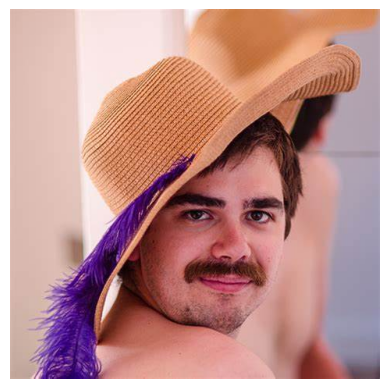

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread("img1.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

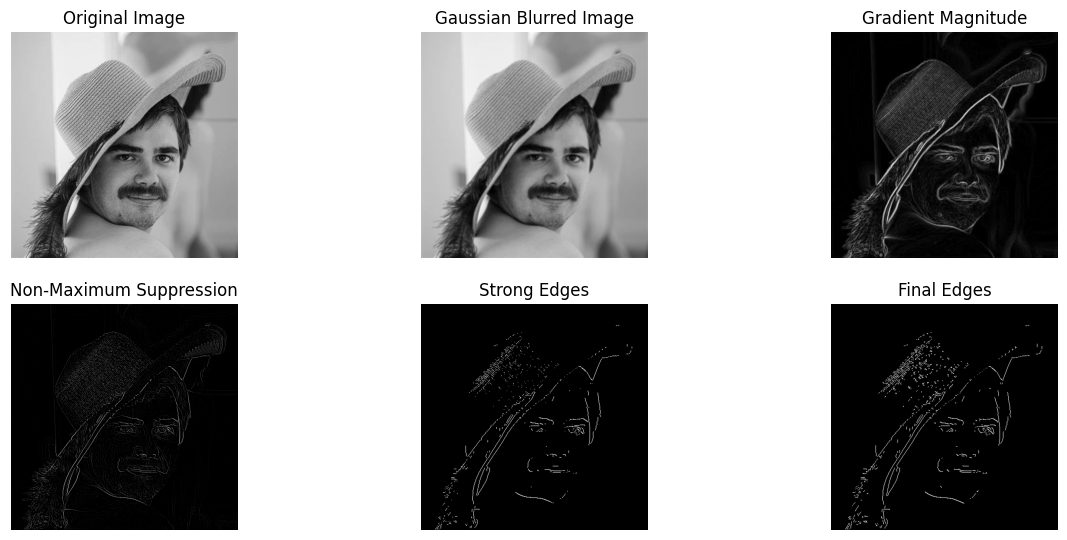

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_blur(image, kernel_size=5, sigma=1.0):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def sobel_gradient(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
    
    grad_mag = cv2.magnitude(grad_x, grad_y)  
    grad_dir = cv2.phase(grad_x, grad_y, angleInDegrees=True)  
    return grad_mag, grad_dir

def non_maximum_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    output = np.zeros_like(grad_mag)
    
    grad_dir = np.round(grad_dir) % 180
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            angle = grad_dir[i, j]
            if (0 <= angle < 45) or (135 <= angle < 180):
                p1, p2 = grad_mag[i, j+1], grad_mag[i, j-1]
            elif (45 <= angle < 90) or (90 <= angle < 135):
                p1, p2 = grad_mag[i+1, j-1], grad_mag[i-1, j+1]

            if grad_mag[i, j] >= p1 and grad_mag[i, j] >= p2:
                output[i, j] = grad_mag[i, j]
            else:
                output[i, j] = 0
    
    return output

def double_thresholding(grad_mag, low_threshold, high_threshold):
    strong_edges = np.zeros_like(grad_mag)
    weak_edges = np.zeros_like(grad_mag)
    
    strong_edges[grad_mag >= high_threshold] = 1
    weak_edges[(grad_mag >= low_threshold) & (grad_mag < high_threshold)] = 1
    
    return strong_edges, weak_edges

def hysteresis(strong_edges, weak_edges):
    rows, cols = strong_edges.shape
    final_edges = np.copy(strong_edges)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if weak_edges[i, j] == 1:
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    final_edges[i, j] = 1
    
    return final_edges

def canny_edge_detection(image, low_threshold=50, high_threshold=150, kernel_size=5, sigma=1.0):

    image = np.float32(image)
    blurred_image = gaussian_blur(image, kernel_size, sigma)

    grad_mag, grad_dir = sobel_gradient(blurred_image)

    nms_edges = non_maximum_suppression(grad_mag, grad_dir)

    strong_edges, weak_edges = double_thresholding(nms_edges, low_threshold, high_threshold)

    final_edges = hysteresis(strong_edges, weak_edges)

    steps = [
        ("Original Image", image),
        ("Gaussian Blurred Image", blurred_image),
        ("Gradient Magnitude", grad_mag),
        ("Non-Maximum Suppression", nms_edges),
        ("Strong Edges", strong_edges),
        ("Final Edges", final_edges)
    ]
    
    plt.figure(figsize=(15, 10))
    for i, (title, img) in enumerate(steps, 1):
        plt.subplot(3, 3, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    
    plt.show()

image_path = 'img1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

canny_edge_detection(image)


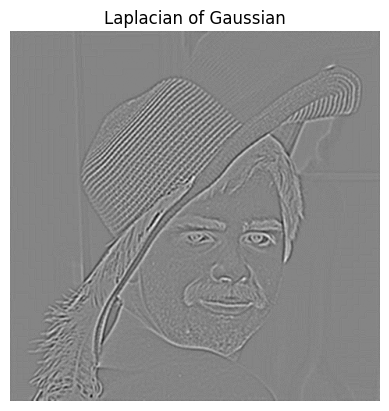

In [3]:

def apply_gaussian_blur(image, sigma, kernel_size=(5,5)):
    
     return cv2.GaussianBlur(image,kernel_size, sigma)
    
def laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def laplacian_of_gaussian(image, sigma):
    blurred_image = apply_gaussian_blur(image, sigma)
    log_image = laplacian_filter(blurred_image)
    return log_image


sigma = 1.4
log_result = laplacian_of_gaussian(image, sigma)

plt.imshow(log_result, cmap='gray')
plt.title("Laplacian of Gaussian")
plt.axis('off')
plt.show()



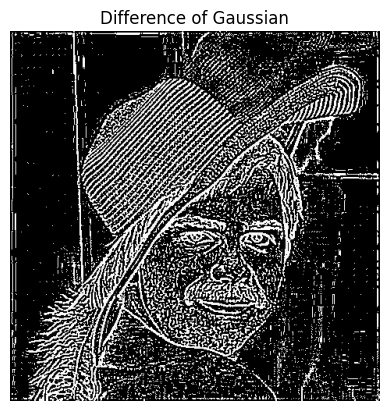

In [4]:
def apply_gaussian_blur(image, sigma, kernel_size=(5,5)):
    
     return cv2.GaussianBlur(image,kernel_size, sigma)  

def difference_of_gaussians(image, sigma1, sigma2):
    blurred_image_1 = apply_gaussian_blur(image, sigma1)
    blurred_image_2 = apply_gaussian_blur(image, sigma2)
    dog_image = blurred_image_1 - blurred_image_2
    return dog_image

def dog(image, sigma1, sigma2):
    dog_result = difference_of_gaussians(image, sigma1, sigma2)
    return dog_result

sigma1 = 1.0
sigma2 = 2.0
dog_result = dog(image, sigma1, sigma2)

plt.imshow(dog_result, cmap='gray')
plt.title("Difference of Gaussian")
plt.axis('off')
plt.show()

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread("img4.jpg")


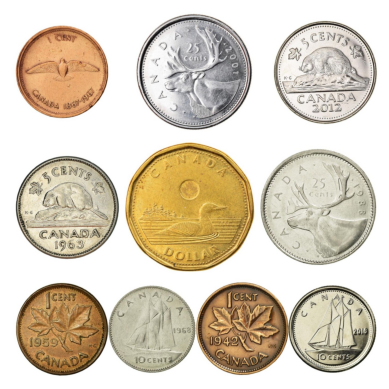

In [6]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

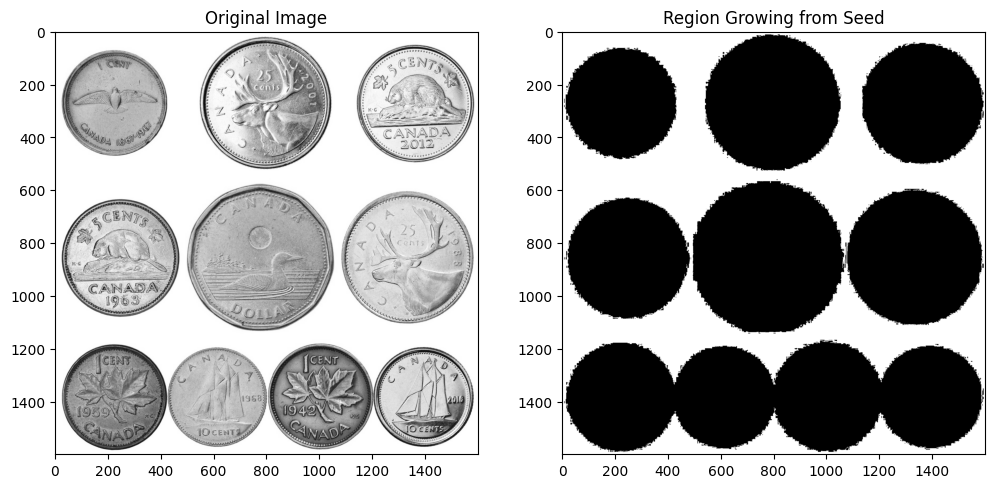

In [7]:
from collections import deque

image_path = 'img4.jpg'  
image = cv2.imread(image_path)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold = 1 
region = np.zeros_like(image_gray)

seed_x, seed_y = 50, 80

def region_growing_seed(image, seed_x, seed_y, threshold):
    region = np.zeros_like(image)
    visited = np.zeros_like(image) 
    queue = deque([(seed_x, seed_y)]) 
    region[seed_x, seed_y] = 1 
    visited[seed_x, seed_y] = 1  
    
    while queue:
        current_x, current_y = queue.popleft()
        
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = current_x + dx, current_y + dy
            if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
            
                if visited[nx, ny] == 0 and abs(int(image[nx, ny]) - int(image[current_x, current_y])) < threshold:
                    region[nx, ny] = 1  
                    visited[nx, ny] = 1  
                    queue.append((nx, ny)) 

    return region

region = region_growing_seed(image_gray, seed_x, seed_y, threshold)

plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(region, cmap='gray')
plt.title('Region Growing from Seed')

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread("image.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()